In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point

In [4]:
#admin1_path = '../Data/Mapping layout/UBOS19 135 districts data/uganda_districts_2019_i.shp'
admin1_path = 'data/UBOS19/uganda_districts_2019_i.shp'
admin1_df = gpd.read_file(admin1_path)
admin1_df.to_crs(crs="EPSG:4326").head()

,F15Regions,DName2016,DNama2017,dc2017,DName2018,dc2018,DName2019,geometry
0,SOUTH BUGANDA,MASAKA,MASAKA,105,MASAKA,105,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993..."
1,BUKEDI,PALLISA,BUTEBO,233,BUTEBO,233,BUTEBO,"POLYGON ((33.87314 1.22742, 33.87306 1.22897, ..."
2,LANGO,ALEBTONG,ALEBTONG,323,ALEBTONG,323,ALEBTONG,"POLYGON ((33.44290 2.36391, 33.44264 2.36336, ..."
3,TESO,BUKEDEA,BUKEDEA,219,BUKEDEA,219,BUKEDEA,"POLYGON ((34.23013 1.49615, 34.22982 1.49197, ..."
4,BUKEDI,BUSIA,BUSIA,202,BUSIA,202,BUSIA,"POLYGON ((33.92632 0.39287, 33.92622 0.39309, ..."


In [5]:
#poe_path='../Data/PoE/2_POE53_from_jenny.csv'
poe_path='data/2_POE53_from_jenny.csv'
poe_data = pd.read_csv(poe_path)
poe_data.rename({'PoEs':'name','LON':'lon','LAT':'lat'},axis=1,inplace=True)
poe_data.drop('#',inplace=True,axis=1)

In [7]:
poe_data['District']= poe_data['District'].str.upper() 
#poe_data[poe_data['District']=="MUKONO"]
admin1_df.rename(columns={'DName2019':'District'}, inplace=True)
df1 = pd.DataFrame(admin1_df)

#df = df[df['EPS'].notna()]

In [8]:
len(poe_data['District'].unique())

30

In [9]:
admin1_df[admin1_df['District']=='KAMPALA']

,F15Regions,DName2016,DNama2017,dc2017,DName2018,dc2018,District,geometry
95,KAMPALA,KAMPALA,KAMPALA,102,KAMPALA,102,KAMPALA,"POLYGON ((450239.264 10038828.318, 450241.226 ..."


### Districts with  an official PoE

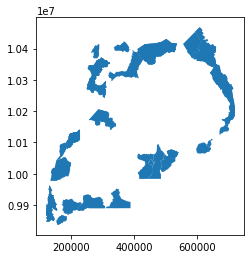

In [10]:
# Get districts with PoE
PoE_districts= admin1_df.merge(poe_data)
PoE_districts.plot()

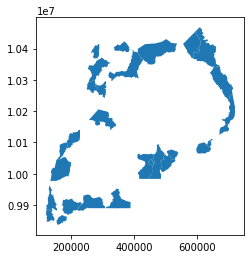

In [11]:
PoE_districts.drop_duplicates(subset='District',inplace=True)
PoE_districts.plot()

In [12]:
len(PoE_districts)

29

### Districts at the borders

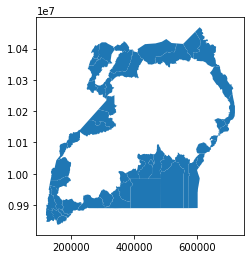

In [13]:

congo = ["Kisoro","Kanungu","Rubirizi","Kasese","Rukungiri","Bundibugyo",
         "Ntoroko","kikuube","Hoima","Buliisa",
         "Pakwach","Nebbi","Zombo","Maracha", "Arua"]
sudan = ["Koboko","Yumbe","Moyo","Adjumani","Amuru",
         "Lamwo","Kitgum","Karenga","Kaabong"]
kenya = ["Moroto","Amudat","Bukwo","Kween",
         "Bududa","Namisindwa","Tororo","Busia",
         "Namayingo"]
tanzania = ["Mayuge","Buvuma","Kalangala","Buikwe",
         "Mukono","Kampala","Wakiso","Mpigi",
          "Kalungu","Masaka","Kyotera","Rakai","Isingiro"]
rwanda = ["Ntungamo","Kabale","Kisoro","Rukiga","Rubanda"]            
         

border_districts = sudan + kenya + tanzania + rwanda + congo
border_districts = [x.upper() for x in border_districts]
border_df  = pd.DataFrame()
border_df["District"] = border_districts
border_df.drop_duplicates(inplace=False)

border_districts = admin1_df.merge(border_df, on="District")
border_districts.plot()

### Border districts with official PoE

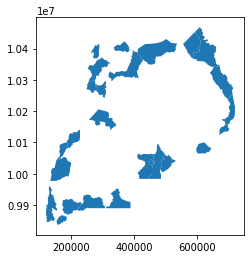

In [14]:
border_districts
border_with_poe = border_districts.merge(PoE_districts)
border_with_poe.plot()

### Borders_without official PoE

In [15]:
border_without_poe = border_districts.set_index('District').drop(index=list(border_with_poe['District']))

In [16]:
border_without_poe.reset_index(inplace=True)

In [17]:
print(len(border_without_poe)+len(border_with_poe),len(border_districts))

# Maybe an issue there?

51 52


### Get centroid 

In [18]:
admin1_df['centroid']=admin1_df['geometry'].centroid

In [19]:
#WIP

# Getting this csv into a shapefile

# creating a geometry column 
geometry = [Point(xy) for xy in zip(poe_data['lon'], poe_data['lat'])]

# Coordinate reference system : WGS84
crs = CRS('epsg:4326')

# Creating a Geographic data frame 
poe_df = gpd.GeoDataFrame(poe_data, crs=crs, geometry=geometry)

poe_df.head()

,District,name,lon,lat,geometry
0,KAMPALA,Port Bell,32.654000,0.290000,POINT (32.65400 0.29000)
1,WAKISO,Entebbe Airport,32.443055,0.044721,POINT (32.44306 0.04472)
2,BUIKWE,Kiyindi,33.145901,0.279041,POINT (33.14590 0.27904)
3,MUKONO,Katosi,32.803276,0.143008,POINT (32.80328 0.14301)
4,KYOTERA,Mutukula,31.416706,-1.000000,POINT (31.41671 -1.00000)


In [20]:
print(admin1_df.loc[95,'District']+"\n",
      poe_df.loc[0,'District']+"\n",
      admin1_df.loc[95,'centroid'].distance(poe_df.loc[0,'geometry'],))

KAMPALA
 KAMPALA
 10045510.493014101


In [22]:
# Get the closest point of entry to centroid 
admin1_df
dist_2_closest=[]

for x in admin1_df.index:
    poe_dist = []
    for y in poe_data.index:        
        dist = admin1_df.loc[x,'centroid'].distance(poe_data.loc[y,'geometry'])
        poe_dist.append(dist)
    dist_2_closest.append(min(poe_dist))
        
        

dist_2_closest

[9952963.11644209,
 10149300.00308898,
 10264442.349246563,
 10170119.928308113,
 10064435.542408489,
 10315691.401157428,
 10072713.645333262,
 10199329.665926266,
 10116830.331995334,
 10135805.055546256,
 10361819.67310098,
 10099510.996546451,
 10115787.464616619,
 9945990.079305304,
 10046761.99392293,
 10102107.747729652,
 10264527.60475717,
 10190211.844327293,
 10403342.152906723,
 9993969.855081135,
 10034232.132972274,
 10410991.212467024,
 10056763.184068242,
 10095847.29430995,
 10159095.28208156,
 10200545.63491115,
 9982632.020381508,
 9923350.74692533,
 10061103.763117738,
 9970739.208732493,
 10280915.419208692,
 9871822.303481983,
 10103467.068118295,
 10211741.358048396,
 10133438.838394394,
 10304592.291876594,
 9874539.205638662,
 10181515.559635982,
 10344824.947926404,
 10389341.601880442,
 10053970.996091997,
 10179185.1092288,
 9911528.002781145,
 10282321.60006938,
 10164950.63702384,
 10075748.105269445,
 10076412.341696428,
 10170327.034280274,
 10116008.8907

In [25]:
dist_min = []

for i in admin1_df.index:
    i_dist = []
    for j in poe_df.index:
        d=admin1_df.loc[i,'centroid'].distance(poe_df.loc[j,'geometry'])/1000
        i_dist.append(d)
        min_i=min(i_dist)
    dist_min.append(min_i)
    

dist_min

[9952.96311644209,
 10149.300003088982,
 10264.442349246563,
 10170.119928308113,
 10064.435542408488,
 10315.691401157428,
 10072.713645333262,
 10199.329665926267,
 10116.830331995334,
 10135.805055546256,
 10361.81967310098,
 10099.51099654645,
 10115.787464616618,
 9945.990079305304,
 10046.76199392293,
 10102.107747729651,
 10264.52760475717,
 10190.211844327294,
 10403.342152906724,
 9993.969855081135,
 10034.232132972274,
 10410.991212467025,
 10056.763184068242,
 10095.84729430995,
 10159.09528208156,
 10200.54563491115,
 9982.632020381508,
 9923.350746925329,
 10061.103763117739,
 9970.739208732493,
 10280.915419208692,
 9871.822303481984,
 10103.467068118294,
 10211.741358048395,
 10133.438838394393,
 10304.592291876594,
 9874.539205638663,
 10181.515559635982,
 10344.824947926403,
 10389.341601880442,
 10053.970996091997,
 10179.1851092288,
 9911.528002781146,
 10282.32160006938,
 10164.95063702384,
 10075.748105269446,
 10076.412341696428,
 10170.327034280273,
 10116.008890

In [29]:
border_with_poe['tag']=1
border_without_poe['tag']=2

border_with_poe_target=border_with_poe[['District','tag']]
border_with_poe_target.set_index('District',drop=True,inplace=True)

border_without_poe_target=border_without_poe[['District','tag']]
border_without_poe_target.set_index('District',drop=True,inplace=True)


In [ ]:
poe=pd.concat([border_with_poe_target,border_without_poe_target])

admin1_df['tag']=0
admin1_export = admin1_df[['District','tag']]#set_index('District',drop=True,inplace=True)
admin1_export.join(poe)